## $$\text{KNN}$$

- paso1: Elegir el número K de vecinos
- paso2: Tomar los K vecinos más cercanos del nuevo dato, según la distancia ecuclidiana (tambiíen puede ser la manhathan(valor absoluto), metrica del infinito, nincouisky,...)
- paso3: Entre esos K vecinos, contar el número de puntos que pertenecen a cada categoría
- paso4: Asignar el nuevo dato a la categoría con más vecinos en ella


<div style="display: flex; justify-content:center">
    <img  src="../img/knn.jpeg">
</div>

### Importamos el data set

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

df = pd.read_csv('../data/Social_Network_Ads.csv')
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

### Dividimos en datos de entranamiento y testeo

In [2]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=0)

### Escalamos

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

### Ajustamos el modelo

In [9]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

### Predecimos

In [10]:
y_pred = classifier.predict(X_test)

### Matriz de confusión

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]])

### Representación gráfica

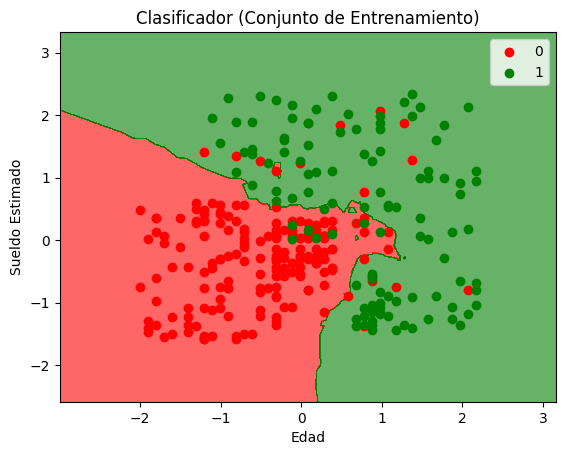

In [17]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)).reshape(1,-1), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()